In [5]:
import random

import networkx as nx
import numpy as np

In [6]:
np.set_printoptions(formatter={"float": lambda x: "{0:0.2f}".format(x)})

# Introduction

In [10]:
M = [
    [0.0, 1.0, 0.0, 0.5],
    [0.5, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.0, 0.5],
    [0.0, 0.0, 1.0, 0.0],
]
M = np.asarray(M)
print("Matrice de transition :")
print(M)

Matrice de transition :
[[0.00 1.00 0.00 0.50]
 [0.50 0.00 0.00 0.00]
 [0.50 0.00 0.00 0.50]
 [0.00 0.00 1.00 0.00]]


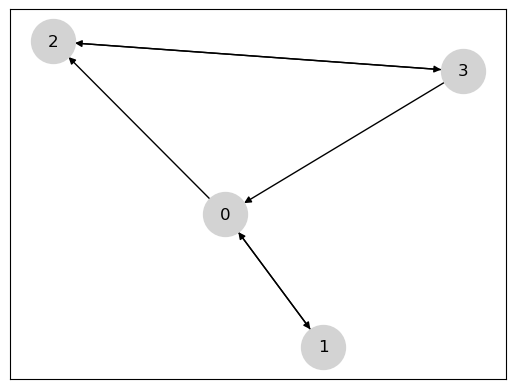

In [16]:
G = nx.from_numpy_matrix(M.T, create_using=nx.DiGraph)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=1000, node_color="lightgray", with_labels=True)

In [17]:
n = 4
beta = 0.9
iterations = 5

In [18]:
P = np.ones(n) / n
print(f"PageRank initial : {P}")

PageRank initial : [0.25 0.25 0.25 0.25]


In [19]:
for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
    print(f"Iteration {i+1} : {P}")

Iteration 1 : [0.36 0.14 0.25 0.25]
Iteration 2 : [0.26 0.19 0.30 0.25]
Iteration 3 : [0.31 0.14 0.26 0.30]
Iteration 4 : [0.29 0.16 0.30 0.25]
Iteration 5 : [0.29 0.15 0.27 0.29]


# Dead-end

In [20]:
M = [
    [0.0, 0.5, 0.0, 0.5],
    [0.5, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.0, 0.5],
    [0.0, 0.5, 0.0, 0.0],
]
M = np.asarray(M)
print("Matrice de transition :")
print(M)

Matrice de transition :
[[0.00 0.50 0.00 0.50]
 [0.50 0.00 0.00 0.00]
 [0.50 0.00 0.00 0.50]
 [0.00 0.50 0.00 0.00]]


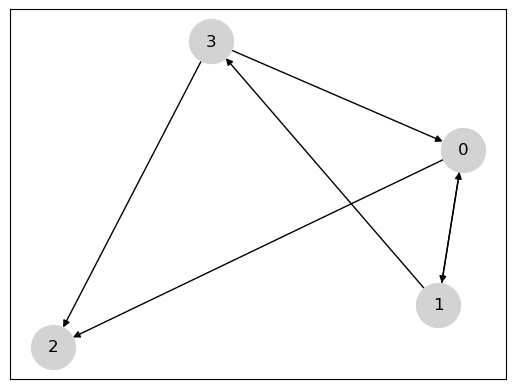

In [22]:
G = nx.from_numpy_matrix(M.T, create_using=nx.DiGraph)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=1000, node_color="lightgray", with_labels=True)

## Sans téléportation

In [23]:
n = 4
beta = 1
iterations = 5

P = np.ones(n) / n
print(f"PageRank initial : {P}")

for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
    print(f"Iteration {i+1} : {P}")

PageRank initial : [0.25 0.25 0.25 0.25]
Iteration 1 : [0.25 0.12 0.25 0.12]
Iteration 2 : [0.12 0.12 0.19 0.06]
Iteration 3 : [0.09 0.06 0.09 0.06]
Iteration 4 : [0.06 0.05 0.08 0.03]
Iteration 5 : [0.04 0.03 0.05 0.02]


## Avec téléportation

In [24]:
n = 4
beta = 0.9
iterations = 5

P = np.ones(n) / n
print(f"PageRank initial : {P}")

for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
    print(f"Iteration {i+1} : {P}")

PageRank initial : [0.25 0.25 0.25 0.25]
Iteration 1 : [0.25 0.14 0.25 0.14]
Iteration 2 : [0.15 0.14 0.20 0.09]
Iteration 3 : [0.13 0.09 0.13 0.09]
Iteration 4 : [0.11 0.08 0.12 0.07]
Iteration 5 : [0.09 0.07 0.10 0.06]


### Grand graphe

In [25]:
n = 100
M = np.random.randint(0, 2, size=(n, n))

# Making sure there is no spider trap
for i in range(n):
    M[i, i] = 0

# Making sure there is no dead-end
for i in range(n):
    if all(M[i] == 0):
        print(f"Row {i}")
        M[i, random.randint(0, n)] = 1
    if all(M[:, i] == 0):
        print(f"Column {i}")
        M[random.randint(0, n), i] = 1

# Convert to probability
M = M / np.sum(M, axis=0)

# Add a dead-end
M[:, random.randint(0, n)] = 0.0

beta = 1
iterations = 1000
P = np.ones(n) / n
for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
print(f"\nSum of PageRank without teleportation: {np.sum(P):.3f}")

beta = 0.9
P = np.ones(n) / n
for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
print(f"\nSum of PageRank with teleportation: {np.sum(P):.3f}")


Sum of PageRank without teleportation: 0.000

Sum of PageRank with teleportation: 0.924


# Spider-Trap

Matrice de transition :
[[0.00 1.00 0.00 0.00]
 [0.33 0.00 1.00 0.00]
 [0.33 0.00 0.00 0.00]
 [0.33 0.00 0.00 1.00]]


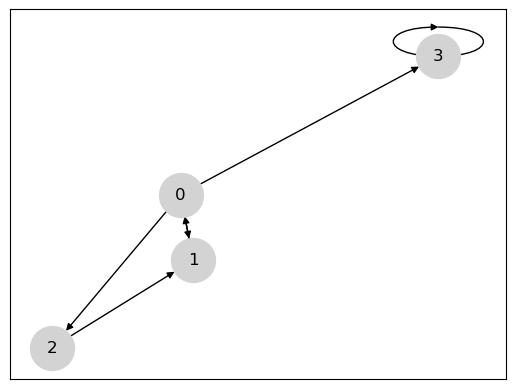

In [27]:
M = [
    [0.00, 1.0, 0.0, 0.0],
    [0.33, 0.0, 1.0, 0.0],
    [0.33, 0.0, 0.0, 0.0],
    [0.33, 0.0, 0.0, 1.0],
]
M = np.asarray(M)
print("Matrice de transition :")
print(M)

G = nx.from_numpy_matrix(M.T, create_using=nx.DiGraph)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=1000, node_color="lightgray", with_labels=True)

## Sans téléportation

In [28]:
n = 4
beta = 1
iterations = 5

P = np.ones(n) / n
print(f"PageRank initial : {P}")

for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
    print(f"Iteration {i+1} : {P}")

PageRank initial : [0.25 0.25 0.25 0.25]
Iteration 1 : [0.25 0.33 0.08 0.33]
Iteration 2 : [0.33 0.17 0.08 0.42]
Iteration 3 : [0.17 0.19 0.11 0.52]
Iteration 4 : [0.19 0.16 0.05 0.58]
Iteration 5 : [0.16 0.12 0.06 0.64]


## Avec téléportation

In [29]:
n = 4
beta = 0.9
iterations = 5

P = np.ones(n) / n
print(f"PageRank initial : {P}")

for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
    print(f"Iteration {i+1} : {P}")

PageRank initial : [0.25 0.25 0.25 0.25]
Iteration 1 : [0.25 0.32 0.10 0.32]
Iteration 2 : [0.32 0.19 0.10 0.39]
Iteration 3 : [0.19 0.21 0.12 0.47]
Iteration 4 : [0.21 0.19 0.08 0.51]
Iteration 5 : [0.20 0.16 0.09 0.54]


### Grand graphe

In [31]:
n = 1000
M = np.random.randint(0, 2, size=(n, n))

# Making sure there is no spider trap
for i in range(n):
    M[i, i] = 0

# Making sure there is no dead-end
for i in range(n):
    if all(M[i] == 0):
        print(f"Row {i}")
        M[i, random.randint(0, n)] = 1
    if all(M[:, i] == 0):
        print(f"Column {i}")
        M[random.randint(0, n), i] = 1

# Add a spider-trap
k = random.randint(0, n)
M[:, k] = 0
M[k, k] = 1

# Convert to probability
M = M / np.sum(M, axis=0)

beta = 1
iterations = 1000
P = np.ones(n) / n
for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
print(f"PageRank du spider-trap without teleportation: {P[k]:.3f}")


beta = 0.9
P = np.ones(n) / n
for i in range(iterations):
    P = beta * M @ P + (1 - beta) * np.ones(n) / n
print(f"PageRank du spider-trap with teleportation: {P[k]:.3f}")

PageRank du spider-trap without teleportation: 0.623
PageRank du spider-trap with teleportation: 0.010
